In [3]:
warnings.filterwarnings("ignore")

In [59]:
#!pip install fastcluster

In [2]:
import warnings
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from missingpy import KNNImputer
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GMM
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

C:\Users\gwhit\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
os.chdir(r'C:\Users\gwhit\Desktop\Gavin\1st semester\STAT 517 Learning-Predictive Modeling\Stat517-master\Data')

In [5]:
happyfn = 'World_Happiness_2015.csv'
happy_2015 = pd.read_csv(happyfn)
happyfn = 'World_Happiness_2016.csv'
happy_2016 = pd.read_csv(happyfn)
happyfn = 'World_Happiness_2017.csv'
happy_2017 = pd.read_csv(happyfn)

In [6]:
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Preprocessing

In [7]:
happy_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [8]:
happy_2015 = pd.get_dummies(happy_2015, columns =[u'Country','Region'])
happy_2015.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,0,0,0,0,0,0,0,0,0,1
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,0,0,0,0,0,0,0,0,0,1
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,0,0,0,0,0,0,0,0,0,1
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,0,0,0,0,0,0,0,0,0,1
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,0,0,0,0,0,1,0,0,0,0


# Partitioning the Data

In [9]:
Y_happy_2015 =happy_2015[u'Happiness Rank']
X_happy_2015 = happy_2015.drop(u'Happiness Rank', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_happy_2015, Y_happy_2015,
                                                random_state=9)
Xcolnames = list(X_happy_2015)

In [10]:
scaler = StandardScaler()
scaler.fit(X_happy_2015)
X_scaled = scaler.transform(X_happy_2015)

# Principle Component Analysis

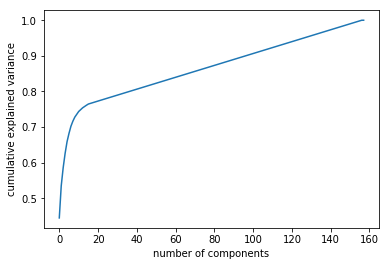

In [11]:
pca = PCA().fit(X_happy_2015)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
pca = PCA(n_components=2)
pca.fit(X_happy_2015)
X_happy_2015_2PCA = pca.transform(X_happy_2015)

# Determining Optimal Number of Clusters

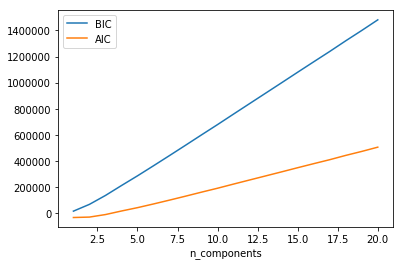

In [37]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(X_happy_2015)
          for n in n_components]

plt.plot(n_components, [m.bic(X_happy_2015) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_happy_2015) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

Based on the BIC vs AIC curve it looks like the optimal number of clusters is 2

In [38]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_happy_2015)
    kmeanModel.fit(X_happy_2015)
    distortions.append(sum(np.min(cdist(X_happy_2015, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_happy_2015.shape[0])

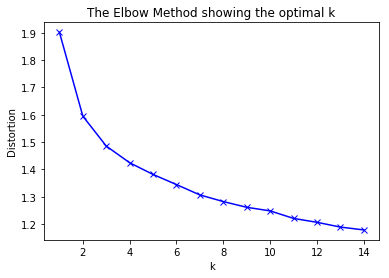

In [39]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the elbow method it looks like the optimal number of clusters is 2

# Visualization with the first 2 principle components

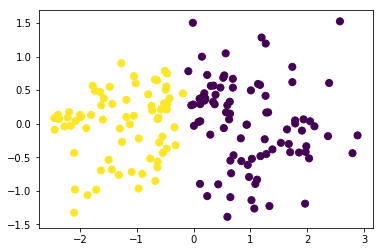

In [40]:
#Spectral Clustering using PCA1 and PCA2
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_happy_2015_2PCA)
plt.scatter(X_happy_2015_2PCA[:, 0], X_happy_2015_2PCA[:, 1], c=labels,
            s=50, cmap='viridis');

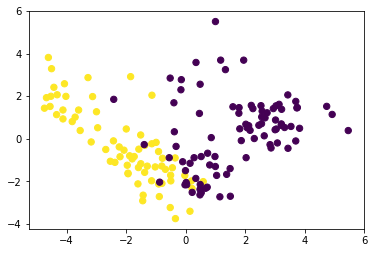

In [41]:
gmm = GMM(n_components=2).fit(X_happy_2015_2PCA)
labels = gmm.predict(X_happy_2015)
plt.scatter(X_happy_2015[:, 0], X_happy_2015[:, 1], c=labels, s=40, cmap='viridis');

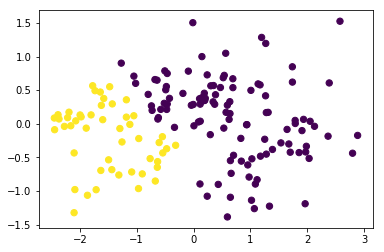

In [43]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X_happy_2015_2PCA)
labels = clustering.labels_
plt.scatter(X_happy_2015_2PCA[:, 0], X_happy_2015_2PCA[:, 1], c=labels, s=40, cmap='viridis')

# Clustering the Entire Dataset

In [ ]:
X_happy_2015 = 

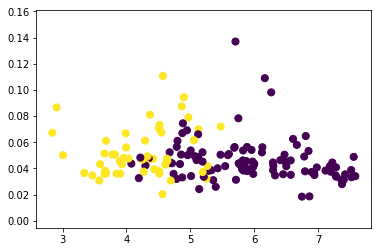

In [46]:
#Spectral Clustering using PCA1 and PCA2
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X_happy_2015)
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels,
            s=50, cmap='viridis');

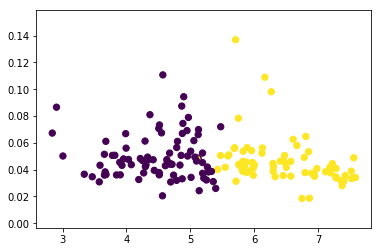

In [47]:
gmm = GMM(n_components=2).fit(X_happy_2015)
labels = gmm.predict(X_happy_2015)
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels, s=40, cmap='viridis');

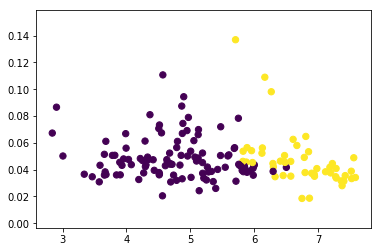

In [48]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X_happy_2015)
labels = clustering.labels_
plt.scatter(X_happy_2015.iloc[:, 0], X_happy_2015.iloc[:, 1], c=labels, s=40, cmap='viridis')

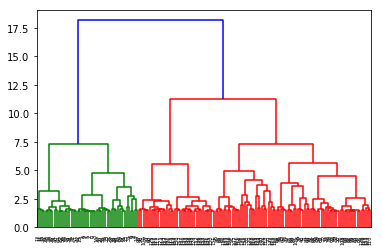

In [51]:
Z = linkage(X_happy_2015, 'ward')
dn = dendrogram(Z)

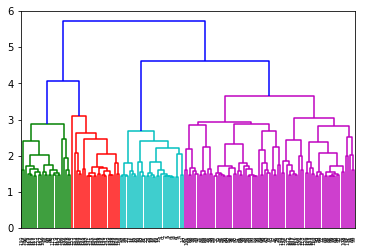

In [53]:
Z = linkage(X_happy_2015, 'complete')
dn = dendrogram(Z)

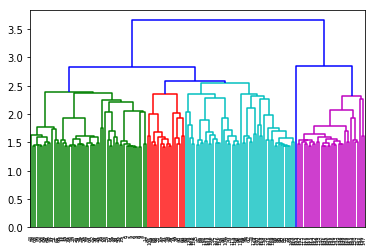

In [54]:
Z = linkage(X_happy_2015, 'weighted')
dn = dendrogram(Z)

# Seriation

In [17]:
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

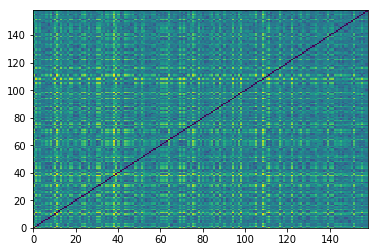

In [16]:
N = len(X_happy_2015)
X = X_happy_2015.iloc[np.random.permutation(N),:]

dist_mat = squareform(pdist(X))

plt.pcolormesh(dist_mat)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()


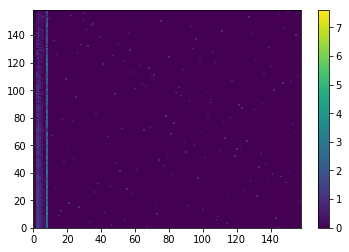

In [19]:
dist_mat = squareform(pdist(X_happy_2015))

N = len(X_happy_2015)
plt.pcolormesh(X_happy_2015)
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

In [49]:
happyfn = 'World_Happiness_2015.csv'
df = pd.read_csv(happyfn)
df = df[['Country','Happiness Rank',]]

------------------------------------------------------------------------------------------
Method:	 ward


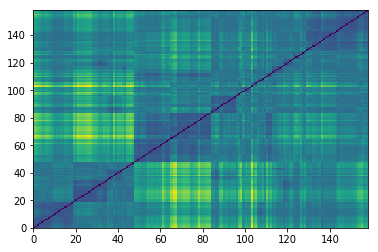

                  Country  Happiness Rank
12                Austria              13
10                 Israel              11
14          United States              15
21                   Oman              22
28                 France              29
31                Uruguay              32
23              Singapore              24
25                Germany              26
30         Czech Republic              31
39               Suriname              40
63                 Russia              64
51                Moldova              52
55              Lithuania              56
46            South Korea              47
56              Nicaragua              57
38                 Kuwait              39
40    Trinidad and Tobago              41
41            El Salvador              42
49                  Italy              50
11             Costa Rica              12
17                Ireland              18
0             Switzerland               1
5                 Finland         

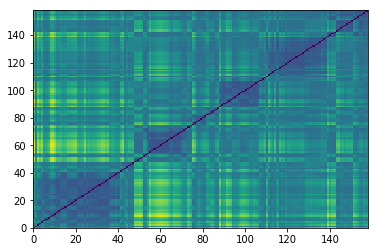

               Country  Happiness Rank
154              Benin             155
69        Turkmenistan              70
152        Afghanistan             153
141            Senegal             142
146         Madagascar             147
89         Philippines              90
111               Iraq             112
126            Armenia             127
155              Syria             156
156            Burundi             157
153             Rwanda             154
135              Yemen             136
137               Mali             138
129            Georgia             130
114           Zimbabwe             115
118              Haiti             119
139            Comoros             140
140             Uganda             141
144           Cambodia             145
149             Guinea             150
150        Ivory Coast             151
120              Nepal             121
112       South Africa             113
121           Ethiopia             122
148               Chad   

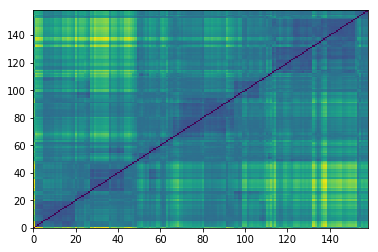

                      Country  Happiness Rank
154                     Benin             155
12                    Austria              13
10                     Israel              11
14              United States              15
21                       Oman              22
63                     Russia              64
51                    Moldova              52
55                  Lithuania              56
46                South Korea              47
56                  Nicaragua              57
38                     Kuwait              39
40        Trinidad and Tobago              41
41                El Salvador              42
49                      Italy              50
28                     France              29
31                    Uruguay              32
23                  Singapore              24
25                    Germany              26
30             Czech Republic              31
39                   Suriname              40
9                   Australia     

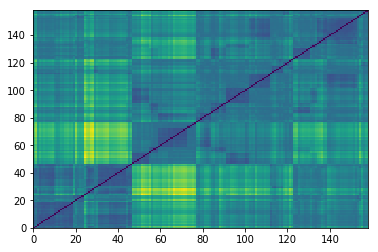

                     Country  Happiness Rank
129                  Georgia             130
146               Madagascar             147
89               Philippines              90
124                    Kenya             125
112             South Africa             113
120                    Nepal             121
116                    India             117
122             Sierra Leone             123
123               Mauritania             124
131                Sri Lanka             132
99                  Mongolia             100
76                Kyrgyzstan              77
83                     China              84
92                 Macedonia              93
95    Bosnia and Herzegovina              96
114                 Zimbabwe             115
118                    Haiti             119
113                    Ghana             114
121                 Ethiopia             122
79                Azerbaijan              80
151             Burkina Faso             152
119       

In [56]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("------------------------------------------------------------------------------------------")
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()
    
    sorter = res_order
    sorterIndex = dict(zip(sorter,range(len(sorter))))
    df['my_Rank'] = df['Happiness Rank'].map(sorterIndex)
    df.sort_values(['Country','Happiness Rank', 'my_Rank'], \
        ascending = [True, True, True], inplace = True)
    df.drop('my_Rank', 1, inplace = True)
    df['my_Rank'] = df['Happiness Rank'].map(sorterIndex)
    df.sort_values(['my_Rank', 'Happiness Rank', 'my_Rank'], \
        ascending = [True , True, True], inplace = True)
    df.drop('my_Rank', 1, inplace = True)
    print(df)
    print("------------------------------------------------------------------------------------------")

The above output compares 4 different methods to produce seriation results. It looks like the ward and average method produces results that are the most consistent with the actual rankings.